# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
1. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
2. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
3. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [11]:
# импорт библиотек

import math
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 10

Функция f(x) $$f(x) = \sin(\frac{x}{5}) * \exp(\frac{x}{10}) + 5 * \exp(\frac{-x}{2})$$

In [7]:
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

x = [i for i in range(1, 31)]
y1 = [f(i) for i in x]

Функция h(f(x)) $$h(f(x)) = int(f(x))$$

In [8]:
def h(x):
    return int(f(x))

y2 = [h(i) for i in x]

Визуализация функций

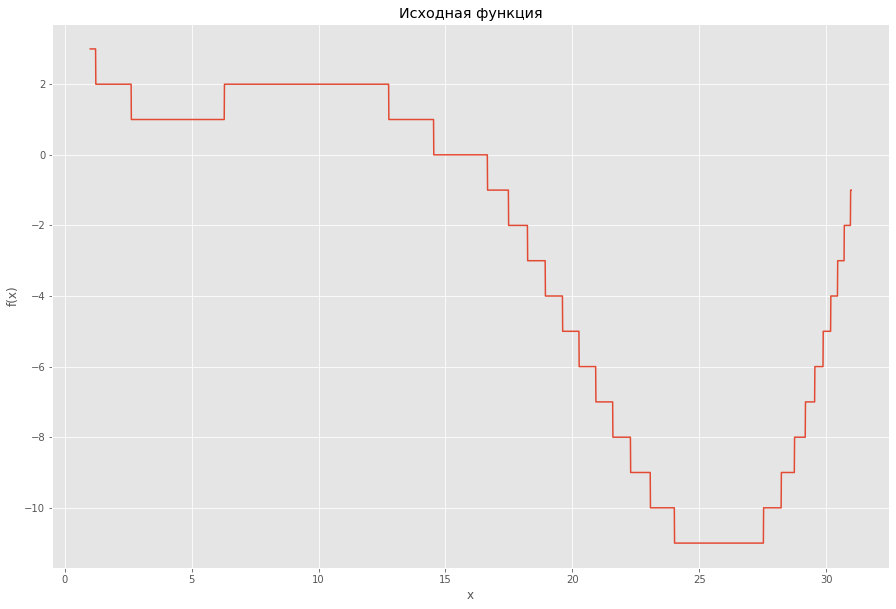

In [15]:
x3 = np.arange(1, 31, 0.01)
y3 = [h(i) for i in np.arange(1, 31, 0.01)]
ax = sns.lineplot(x3, y3)
ax.set(xlabel='x', ylabel='f(x)', title='Исходная функция');

Попытка найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. 

In [16]:
optimization1 = minimize(h, 30, method='BFGS')
print(optimization1)
answer1 = optimization1['fun']

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


Попытка найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

In [17]:
optimization2 = differential_evolution(h, [(1, 30)])
print(optimization2)
answer2 = optimization2['fun']

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([24.39393537])


Запись ответа в файл

In [18]:
with open('answer3.txt', 'w') as f:
    f.write('{0} {1}'.format(answer1, answer2))

#### Вывод: BFGS использует градиент и явно не пригоден для минимизации функции h(f(x)). Дифференциальная эволюция не использует градиент и справилась с поиском глобального минимума